## Amazon Diwali Sales 2025 (Synthetic Data) - Sentiment Analysis 

### Data Import, Cleaning, and Transformation

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [17]:
df_sales_data = pd.read_csv('amazon_sales_2025_INR.csv')

In [18]:
df_sales_data.head(1)

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,India


In [19]:
df_sales_data.info()
df_sales_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          15000 non-null  object 
 1   Date              15000 non-null  object 
 2   Customer_ID       15000 non-null  object 
 3   Product_Category  15000 non-null  object 
 4   Product_Name      15000 non-null  object 
 5   Quantity          15000 non-null  int64  
 6   Unit_Price_INR    15000 non-null  float64
 7   Total_Sales_INR   15000 non-null  float64
 8   Payment_Method    15000 non-null  object 
 9   Delivery_Status   15000 non-null  object 
 10  Review_Rating     15000 non-null  int64  
 11  Review_Text       15000 non-null  object 
 12  State             15000 non-null  object 
 13  Country           15000 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.6+ MB


Index(['Order_ID', 'Date', 'Customer_ID', 'Product_Category', 'Product_Name',
       'Quantity', 'Unit_Price_INR', 'Total_Sales_INR', 'Payment_Method',
       'Delivery_Status', 'Review_Rating', 'Review_Text', 'State', 'Country'],
      dtype='object')

In [20]:
df_sales_data.describe()

,Quantity,Unit_Price_INR,Total_Sales_INR,Review_Rating
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,2.984667,24955.313715,74544.120233,3.040133
std,1.422826,14401.316925,59369.654155,1.411048
min,1.000000,202.570000,204.050000,1.000000
25%,2.000000,12512.937500,27087.852500,2.000000
50%,3.000000,24878.755000,57293.570000,3.000000
75%,4.000000,37496.170000,112188.600000,4.000000
max,5.000000,49994.430000,249955.500000,5.000000


In [21]:
df_sales_data.isnull().sum()

Order_ID            0
Date                0
Customer_ID         0
Product_Category    0
Product_Name        0
Quantity            0
Unit_Price_INR      0
Total_Sales_INR     0
Payment_Method      0
Delivery_Status     0
Review_Rating       0
Review_Text         0
State               0
Country             0
dtype: int64

In [22]:
df_sales_data.columns = df_sales_data.columns.str.strip()

In [23]:
df_sales_data['Date'] = pd.to_datetime(df_sales_data['Date'])

In [24]:
df_sales_data['Month'] = df_sales_data['Date'].dt.month_name()
df_sales_data['Week'] = df_sales_data['Date'].dt.isocalendar().week
df_sales_data['Day'] = df_sales_data['Date'].dt.day_name()

In [65]:
df_sales_data.head(1)

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country,Month,Week,Day,Sentiment_Score,Sentiment_Label
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,India,January,4,Saturday,-0.2,Negative


### Descriptive Sales Insights (EDA)
    💰 Overall Sales Performance,🏆 Top Product Categories by Revenue,🧺 Top-Selling Products,💳 Payment Method Preferences,
    🚚 Delivery Status Distribution

In [26]:
total_sales = df_sales_data['Total_Sales_INR'].sum()
total_orders = df_sales_data['Order_ID'].count()
total_customers = df_sales_data['Customer_ID'].nunique()
avg_order_value = df_sales_data['Total_Sales_INR'].mean()
avg_order_quantity = df_sales_data['Quantity'].mean()

print(f"Total Sales: ₹{total_sales:,.0f}")
print(f"Total Orders: {total_orders}")
print(f"Total Customers: {total_customers}")
print(f"Avg Order Value: {avg_order_value:,.0f}")
print(f"Avg Order Quantity: {avg_order_quantity:,.0f}")

Total Sales: ₹1,118,161,804
Total Orders: 15000
Total Customers: 7259
Avg Order Value: 74,544
Avg Order Quantity: 3


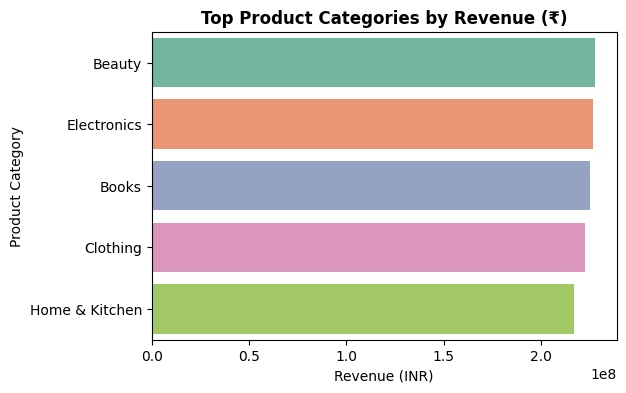

In [83]:
top_categories = df_sales_data.groupby('Product_Category')['Total_Sales_INR'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(
    x=top_categories.values,
    y=top_categories.index,
    palette='Set2'
)
plt.title("Top Product Categories by Revenue (₹)", fontsize=12, fontweight='bold')
plt.xlabel("Revenue (INR)", fontsize=10)
plt.ylabel("Product Category", fontsize=10)
plt.show()

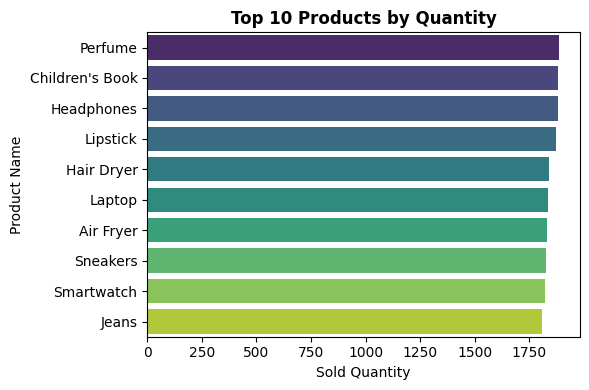

In [78]:
top_selling_products = df_sales_data.groupby('Product_Name')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(6,4))
sns.barplot(
    x=top_selling_products.values,
    y=top_selling_products.index,
    hue=top_selling_products.index,   
    palette='viridis',                
    legend=False                     
)
plt.title("Top 10 Products by Quantity", fontsize=12, fontweight='bold')
plt.xlabel("Sold Quantity", fontsize=10)
plt.ylabel("Product Name", fontsize=10)

plt.tight_layout()
plt.show()

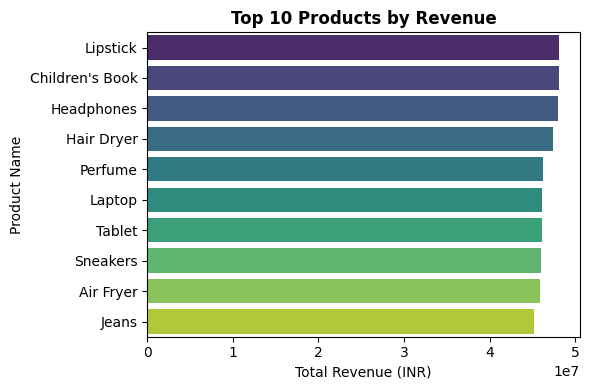

In [77]:
top_products_revenue = (
    df_sales_data.groupby('Product_Name')['Total_Sales_INR']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(6,4))
sns.barplot(
    x=top_products_revenue.values,
    y=top_products_revenue.index,
    hue=top_products_revenue.index,   
    palette='viridis',                
    legend=False                     
)
plt.title("Top 10 Products by Revenue", fontsize=12, fontweight='bold')
plt.xlabel("Total Revenue (INR)", fontsize=10)
plt.ylabel("Product Name", fontsize=10)

plt.tight_layout()
plt.show()

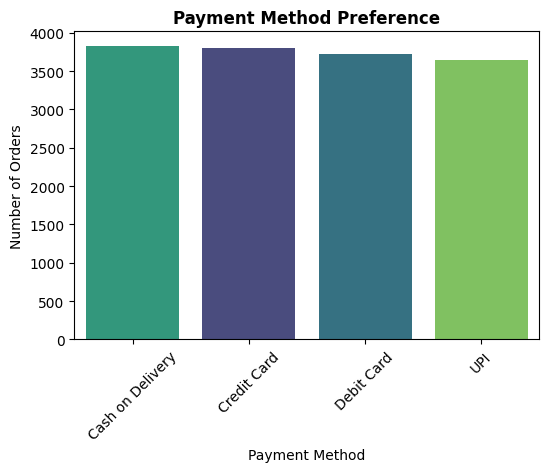

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(
    x='Payment_Method',
    hue='Payment_Method',       
    data=df_sales_data,
    order=df_sales_data['Payment_Method'].value_counts().index,
    palette='viridis',
    legend=False                    
)
plt.title("Payment Method Preference", fontsize=12, fontweight='bold')
plt.xlabel("Payment Method", fontsize=10)
plt.ylabel("Number of Orders", fontsize=10)
plt.xticks(rotation=45)
plt.show()

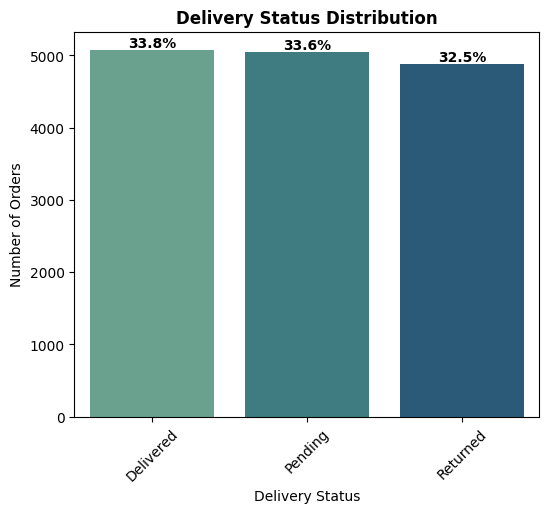

In [62]:
plt.figure(figsize=(6,5))

ax = sns.countplot(
    x='Delivery_Status',
    data=df_sales_data,
    order=df_sales_data['Delivery_Status'].value_counts().index,
    palette='crest'
)

total = len(df_sales_data)
for p in ax.patches:
    count = p.get_height()
    percentage = count / total * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Delivery Status Distribution", fontsize=12, fontweight='bold')
plt.xlabel("Delivery Status", fontsize=10)
plt.ylabel("Number of Orders", fontsize=10)
plt.xticks(rotation=45)
plt.show()

In [68]:
revenue_by_status = df_sales_data.groupby('Delivery_Status').agg({
    'Total_Sales_INR': 'sum',
    'Order_ID': 'count',
    'Quantity': 'sum'
}).reset_index()


revenue_by_status.columns = ['Delivery_Status', 'Total_Revenue_INR', 'Total_Orders', 'Total_Quantity']

total_revenue = revenue_by_status['Total_Revenue_INR'].sum()
total_orders = revenue_by_status['Total_Orders'].sum()
total_quantity = revenue_by_status['Total_Quantity'].sum()

revenue_by_status['Revenue_Percentage'] = (revenue_by_status['Total_Revenue_INR'] / total_revenue * 100).round(2)
revenue_by_status['Orders_Percentage'] = (revenue_by_status['Total_Orders'] / total_orders * 100).round(2)
revenue_by_status['Quantity_Percentage'] = (revenue_by_status['Total_Quantity'] / total_quantity * 100).round(2)

revenue_by_status

,Delivery_Status,Total_Revenue_INR,Total_Orders,Total_Quantity,Revenue_Percentage,Orders_Percentage,Quantity_Percentage
0,Delivered,3.787490e+08,5075,15167,33.87,33.83,33.88
1,Pending,3.762141e+08,5044,15010,33.65,33.63,33.53
2,Returned,3.631986e+08,4881,14593,32.48,32.54,32.60


### Sentiment Analysis
    🧠 Generating Sentiment Scores,🪞 Categorizing Reviews (Positive, Neutral, Negative),📈 Sentiment Distribution,
    ⭐ Review Ratings vs Sentiment,📦 Category-Level Sentiment Insights,💰 Sentiment Impact on Revenue

In [35]:
df_sales_data['Sentiment_Score'] = df_sales_data['Review_Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [36]:
def label_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df_sales_data['Sentiment_Label'] = df_sales_data['Sentiment_Score'].apply(label_sentiment)

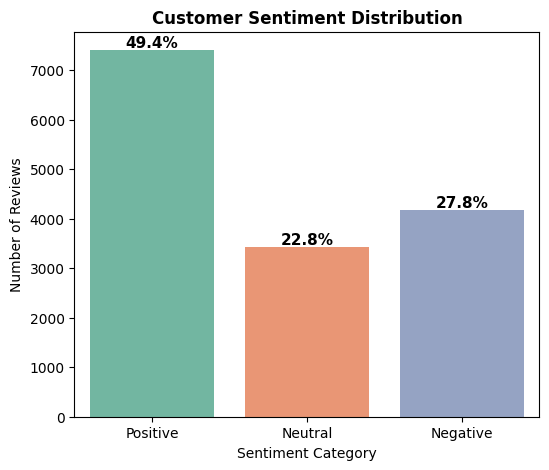

In [47]:
sentiment_counts = df_sales_data['Sentiment_Label'].value_counts()
sentiment_percent = (sentiment_counts / sentiment_counts.sum() * 100).round(2)

sentiment_summary = pd.DataFrame({
    'Sentiment_Label': sentiment_counts.index,
    'Count': sentiment_counts.values,
    'Percentage (%)': sentiment_percent.values
})


plt.figure(figsize=(6,5))
ax = sns.countplot(
    x='Sentiment_Label',
    data=df_sales_data,
    order=['Positive','Neutral','Negative'],
    palette='Set2'
)

total = len(df_sales_data)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.text(
        p.get_x() + p.get_width() / 2., 
        count + 1,                      
        percentage,                 
        ha='center', va='bottom', fontsize=11, fontweight='bold'
    )

plt.title("Customer Sentiment Distribution", fontsize=12, fontweight='bold')
plt.xlabel("Sentiment Category", fontsize=10)
plt.ylabel("Number of Reviews", fontsize=10)
plt.show()

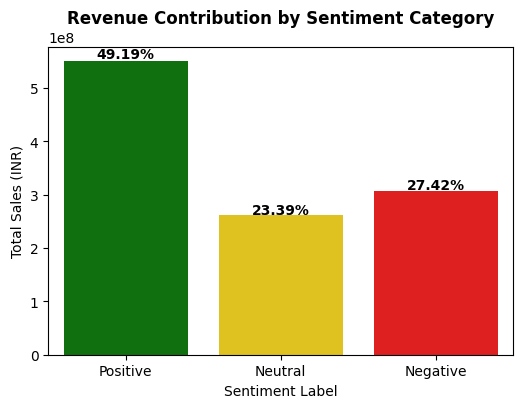

In [109]:
order = ['Positive', 'Neutral', 'Negative']

plt.figure(figsize=(6,4))
ax = sns.barplot(
    x='Sentiment_Label',
    y='Total_Sales_INR',
    data=df_revenue_sentiment_label,
    order=order,
    palette=sentiment_colors
)

for i, sentiment in enumerate(order):
    value = df_revenue_sentiment_label.loc[df_revenue_sentiment_label['Sentiment_Label'] == sentiment, 'Total_Sales_INR'].values[0]
    perc = df_revenue_sentiment_label.loc[df_revenue_sentiment_label['Sentiment_Label'] == sentiment, 'Percentage'].values[0]
    offset = value * 0.01
    ax.text(
        i,             
        value + offset, 
        f'{perc}%',
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

plt.title("Revenue Contribution by Sentiment Category", fontsize=12, fontweight='bold')
plt.xlabel("Sentiment Label", fontsize=10)
plt.ylabel("Total Sales (INR)", fontsize=10)
plt.show()

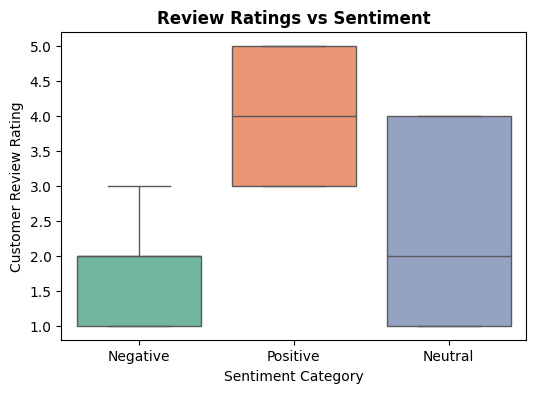

In [48]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='Sentiment_Label',
    y='Review_Rating',
    hue='Sentiment_Label',       
    data=df_sales_data,
    palette='Set2',
    legend=False
)
plt.title("Review Ratings vs Sentiment", fontsize=12, fontweight='bold')
plt.xlabel("Sentiment Category", fontsize=10)
plt.ylabel("Customer Review Rating", fontsize=10)
plt.show()

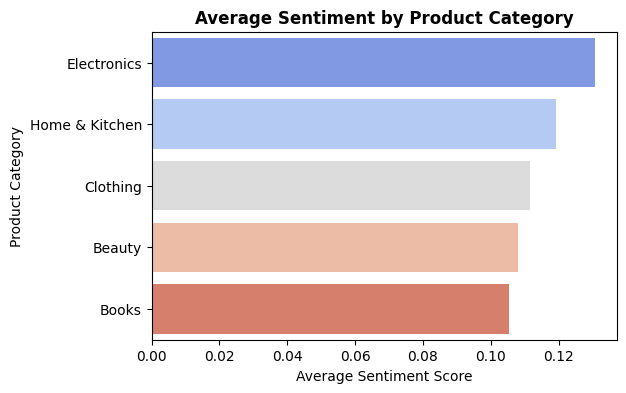

In [53]:
cat_sentiment = df_sales_data.groupby('Product_Category')['Sentiment_Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(
    x=cat_sentiment.values,
    y=cat_sentiment.index,
    hue=cat_sentiment.index,  
    palette='coolwarm',       
    legend=False               
)
plt.title("Average Sentiment by Product Category", fontsize=12, fontweight='bold')
plt.xlabel("Average Sentiment Score", fontsize=10)
plt.ylabel("Product Category", fontsize=10)
plt.show()

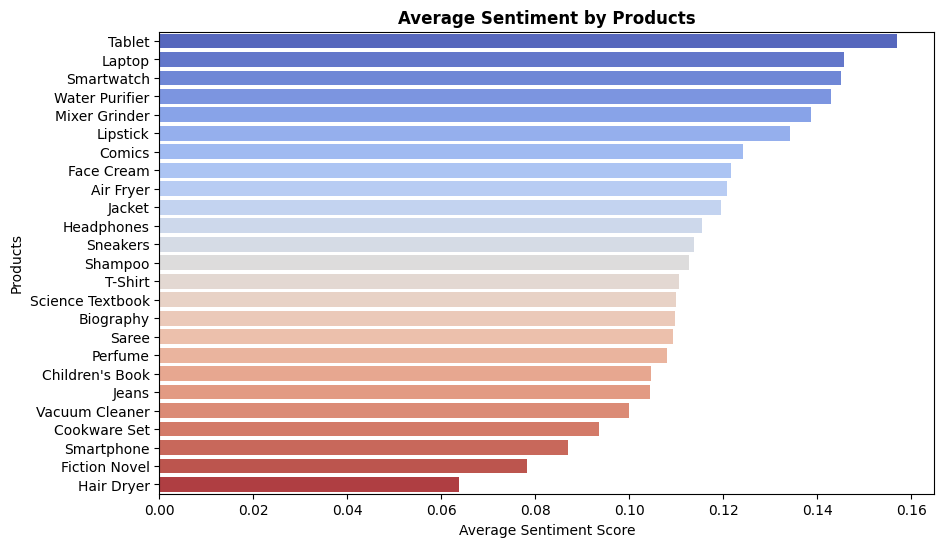

In [87]:
product_sentiment = df_sales_data.groupby('Product_Name')['Sentiment_Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x=product_sentiment.values,
    y=product_sentiment.index,
    hue=product_sentiment.index,  
    palette='coolwarm',       
    legend=False               
)
plt.title("Average Sentiment by Products", fontsize=12, fontweight='bold')
plt.xlabel("Average Sentiment Score", fontsize=10)
plt.ylabel("Products", fontsize=10)
plt.show()

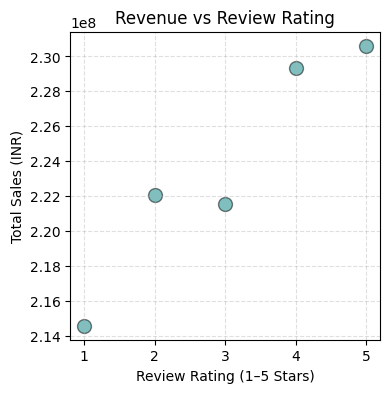

In [56]:
revenue_by_review = df_sales_data.groupby('Review_Rating')['Total_Sales_INR'].sum().reset_index()

plt.figure(figsize=(4,4))
plt.scatter(revenue_by_review['Review_Rating'], revenue_by_review['Total_Sales_INR'], 
            s=100, color='teal', alpha=0.5, edgecolor='k')

plt.title("Revenue vs Review Rating", fontsize=12)
plt.xlabel("Review Rating (1–5 Stars)")
plt.ylabel("Total Sales (INR)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

## 💡Key Business Insights

• Overall Sales Performance:
    The Diwali festive sales generated a total revenue of ₹1,118,161,804 from 15,000 orders, 
    with an average order value of ₹74,544 and an average quantity of 3 items per order.

• Customer Sentiment:
    Only 49.4% of reviews were positive, while the rest were neutral or negative, 
    indicating that the festive campaign did not fully meet customer expectations.

• Revenue Contribution by Sentiment:
    Positive reviews accounted for 49.19% of total revenue, whereas negative reviews contributed 27.42%, 
    highlighting the financial impact of dissatisfied customers.

• Category-Level Performance:
    Highest revenue - Beauty products dominated in terms of total revenue.
    Best sentiment - Electronics led in average customer sentiment, suggesting strong perceived quality despite not always being the top seller.
    Top Products by Quantity Sold - Perfume, Children’s Books, Headphones, Lipstick, and Hair Dryers were the most sold products by quantity. 
        However, none of these top-selling items rank in the top 5 for average sentiment, 
        indicating that high sales do not always align with high customer satisfaction.

• Actionable Insight:
    Products with high sentiment but lower sales (like Electronics) could be promoted more aggressively.
    High-quantity, low-sentiment products (e.g., Perfume, Lipstick) may need quality improvements, better descriptions, 
    or post-purchase engagement to improve customer experience.